# Polynomial Regression
- We use this technique to predict when the given Dataset is not Linear.
- In this we add some Polynomial terms to the **Multiple Linear regression** equation to convert it into Polynomial Regression
![image](https://static.javatpoint.com/tutorial/machine-learning/images/machine-learning-polynomial-regression.png)
- ### Equation: y= b<sub>0</sub> + b<sub>1</sub>x<sub>1</sub> + b<sub>2</sub>x<sub>1</sub>$^2$ + b<sub>3</sub>x<sub>1</sub>$^3$ + .... + b<sub>n</sub>x<sub>1</sub>$^n$

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Import Dataset

In [2]:
df = pd.read_csv("./Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


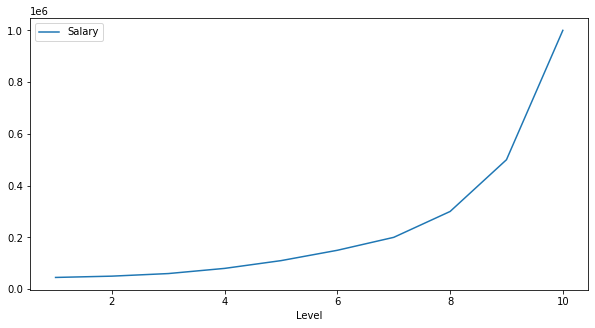

In [3]:
df.plot(x="Level", y="Salary", figsize=(10, 5));

As shown in the graph the data is Non-Linear

In [4]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1:].values

In [5]:
X[:2]

array([[1],
       [2]], dtype=int64)

In [6]:
y[:2]

array([[45000],
       [50000]], dtype=int64)

## Training the Linear Regression Model

First we will train the Linear Regression Model on whole data for comparison with the Polynomial Regression Model

In [7]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y)

LinearRegression()

In [8]:
linear_reg.predict([[9.5]])

array([[573015.15151515]])

## Training the Polynommial Regression Model

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [10]:
linear_reg_2 = LinearRegression()
linear_reg_2.fit(X_poly, y)

LinearRegression()

## Visualizing Linear Regression

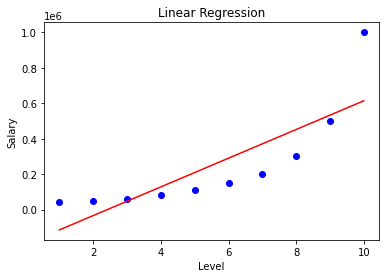

In [13]:
plt.scatter(X, y, c="blue")
plt.plot(X, linear_reg.predict(X), c="red")
plt.title("Linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

## Visualizing Polynomial Regression

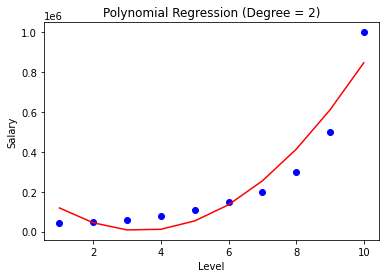

In [31]:
plt.scatter(X, y, c="blue")
plt.plot(X, linear_reg_2.predict(X_poly), c="red")
plt.title("Polynomial Regression (Degree = 2)")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

## Visualizing Polynomial Regression with Higher Resolution

In [32]:
poly_reg = PolynomialFeatures(degree=4)
X_poly_higher = poly_reg.fit_transform(X)

linear_reg_3 = LinearRegression()
linear_reg_3.fit(X_poly_higher, y)

LinearRegression()

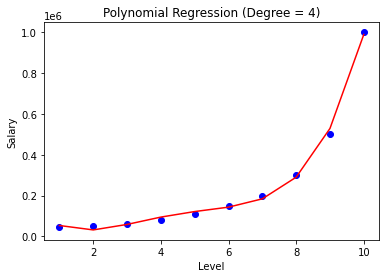

In [33]:
plt.scatter(X, y, c="blue")
plt.plot(X, linear_reg_3.predict(X_poly_higher), c="red")
plt.title("Polynomial Regression (Degree = 4)")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

## Comparing Results

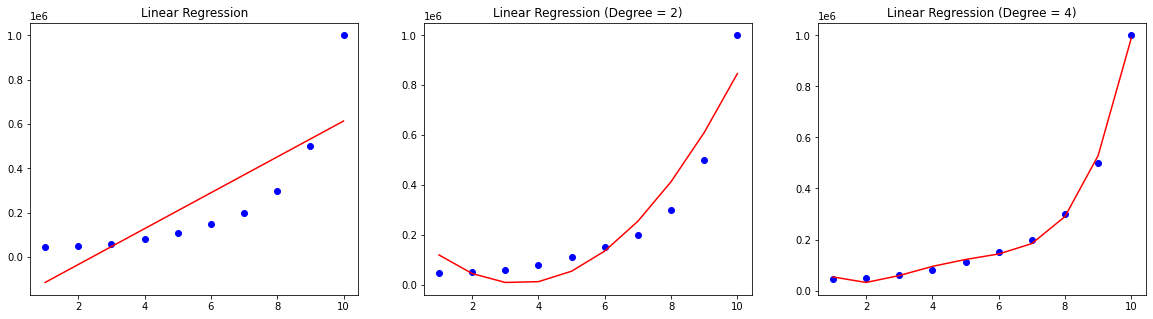

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))

# Linear Regression
ax1.scatter(X, y, c="blue")
ax1.plot(X, linear_reg.predict(X), c="red")
ax1.set_title("Linear Regression")

# Polynomial Regression (Degree = 2)
ax2.scatter(X, y, c="blue")
ax2.plot(X, linear_reg_2.predict(X_poly), c="red")
ax2.set_title("Linear Regression (Degree = 2)")

# Polynomial Regression (Degree = 4)
ax3.scatter(X, y, c="blue")
ax3.plot(X, linear_reg_3.predict(X_poly_higher), c="red")
ax3.set_title("Linear Regression (Degree = 4)");

## Predicting new results with Linear Regression

In [53]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [61]:
a = [[6.5]]
linear_reg.predict(a)

array([[330378.78787879]])

## Predicting new result on Polynomial Regression

In [55]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [62]:
a = [[6.5]]

poly_reg = PolynomialFeatures(degree=2)
linear_reg_2.predict(poly_reg.fit_transform(a))

array([[189498.10606061]])

In [63]:
a = [[6.5]]

poly_reg = PolynomialFeatures(degree=4)
linear_reg_3.predict(poly_reg.fit_transform(a))

array([[158862.45265153]])